# Laboratory session 06

 Capettini Hilario (Matricola N. 2013031)

In [40]:
#Imports
library("tibble")
library("tidyverse")
library("magrittr")
library(Bolstad2)       #integral

library(showtext)
showtext_auto()

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

##  Exercise 1


-  The number of particles emitted by a radioactive source during a fixed interval of time $(\Delta t = 10 s)$ follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: $4, 1, 3, 1, 3$


###  suppose a uniform prior distribution for the parameter $\mu$

- determine and draw the posterior distribution for μ, given the data
 

- evaluate mean, median and variance, both analytically and numerically in R



In [71]:
#We are in presence of a Poisson process and we want to use a uniform prior
#this can be represented by a Gamma function with alpha = 1 lambda=0

#measurements
samples <- c(4,1,3,1,3)
n <- length(samples)

#Prior
x <- seq(0,10,0.01)
alpha_pri  <- 1 
lambda_pri <- 0

prior  <- dgamma(x=x, shape=alpha_pri, rate=lambda_pri)

#Posterior
#It can berepresented by a Gamma(alpha,lambda) function with alpha=sum(x_i)+1 and lambda = 5
alpha_post  <- 1+sum(samples) 
lambda_post <- n

posterior  <- dgamma(x=x, shape=alpha_post, rate=lambda_post)

df1 <- data.frame(x, prior, posterior)

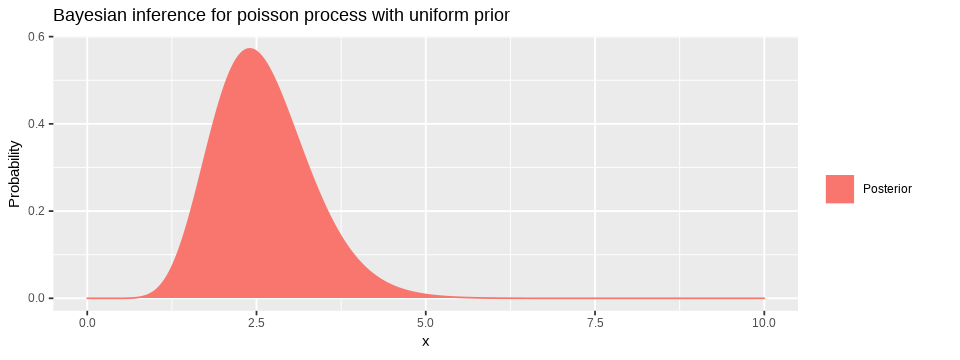

In [73]:
set_plot_dimensions(8, 3)
colors <- c('Posterior' = "#F8766D")

ggplot(df1, aes(x = x,y = posterior, color = 'Posterior')) +
    geom_area(fill='#F8766D')  +
    labs(title ="Bayesian inference for poisson process with uniform prior",
         x = "x",
         y = "Probability",
         color = "") +
    scale_color_manual(values = colors)

The mean of a Gamma($\alpha,\lambda$) function is given by
$$E = \frac{\alpha}{\lambda}$$

While the variance is given by
$$ Var =\frac{\alpha}{\lambda ^2}$$

In [74]:
mean <- sintegral(x,x*posterior)$int
variance <- sintegral(x,x*x*posterior)$int - mean**2

In [75]:
print(paste("The analitically obtained mean value for the posterior is =  ", sprintf("%.6f",alpha_post/lambda_post)))
print(paste("The numerically obtained mean value for the posterior is =  ", sprintf("%.6f",mean)))

[1] "The analitically obtained mean value for the posterior is =   2.600000"
[1] "The numerically obtained mean value for the posterior is =   2.599998"


In [76]:
print(paste("The analitically obtained variance value for the posterior is =  ", sprintf("%.5f",alpha_post/lambda_post**2)))
print(paste("The numerically obtained variance value for the posterior is =  ", sprintf("%.5f",variance)))

[1] "The analitically obtained variance value for the posterior is =   0.52000"
[1] "The numerically obtained variance value for the posterior is =   0.52001"


In [85]:
for (i in x){if (pgamma(i, shape=alpha_post, rate=lambda_post) >= 0.5){break}}
median <- i

print(paste("The numerically obtained median value for the posterior is =  ", sprintf("%.2f",median)))

[1] "The numerically obtained median value for the posterior is =   2.54"


###  suppose a Jeffrey’s prior for the parameter $\mu$

- determine and draw the posterior distribution for $\mu$, given the data
 

- evaluate mean, median and variance, both analytically and numerically in R


In [86]:
#Prior
alpha_pri  <- 0.5
lambda_pri <- 0

prior  <- dgamma(x=x, shape=alpha_pri, rate=lambda_pri)

#Posterior
#It can berepresented by a Gamma(alpha,lambda) function with alpha=sum(x_i)+0.5 and lambda = 5
alpha_post  <- alpha_pri + sum(samples) 
lambda_post <- lambda_pri + n

posterior  <- dgamma(x=x, shape=alpha_post, rate=lambda_post)

dfjef <- data.frame(x, prior, posterior)

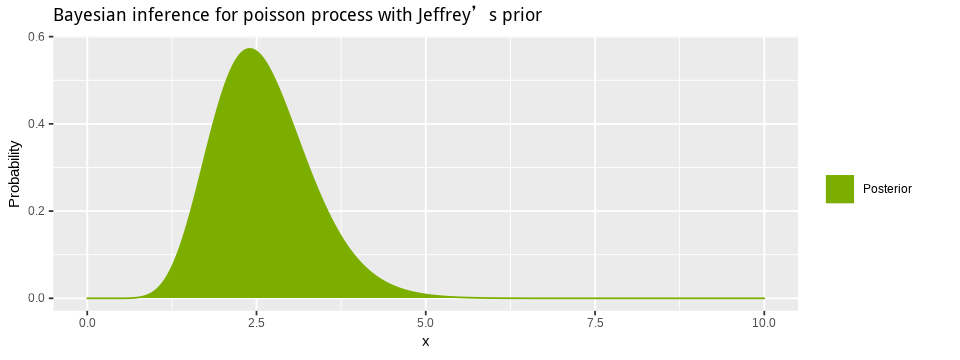

In [87]:
set_plot_dimensions(8, 3)
colors <- c('Posterior' = "#7CAE00")

ggplot(df1, aes(x = x,y = posterior, color = 'Posterior')) +
    geom_area(fill='#7CAE00')  +
    labs(title ="Bayesian inference for poisson process with Jeffrey’s prior",
         x = "x",
         y = "Probability",
         color = "") +
    scale_color_manual(values = colors)

In [88]:
mean <- sintegral(x,x*posterior)$int
variance <- sintegral(x,x*x*posterior)$int - mean**2

In [89]:
print(paste("The analitically obtained mean value for the posterior is =  ", sprintf("%.6f",alpha_post/lambda_post)))
print(paste("The numerically obtained mean value for the posterior is =  ", sprintf("%.6f",mean)))

[1] "The analitically obtained mean value for the posterior is =   2.500000"
[1] "The numerically obtained mean value for the posterior is =   2.499998"


In [90]:
print(paste("The analitically obtained variance value for the posterior is =  ", sprintf("%.5f",alpha_post/lambda_post**2)))
print(paste("The numerically obtained variance value for the posterior is =  ", sprintf("%.5f",variance)))

[1] "The analitically obtained variance value for the posterior is =   0.50000"
[1] "The numerically obtained variance value for the posterior is =   0.50001"


In [91]:
for (i in x){if (pgamma(i, shape=alpha_post, rate=lambda_post) >= 0.5){break}}
median <- i

print(paste("The numerically obtained median value for the posterior is =  ", sprintf("%.2f",median)))

[1] "The numerically obtained median value for the posterior is =   2.44"


###  evaluate a $95$% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation


## Exercise 2


- given 30 the problem of the lightouse discussed Parameter last estimation week, study I the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown

<img src="images\lighthouse.png">

## Exercise 3


- given the signal over the background example discussed last week, analyze and discuss the following cases:

### vary the sampling resolution of used to generate the data, keeping the same sampling range

$\texttt{xdat <- seq(from=-7*w,to=7*w, by=0.5*w)}$

- change the resolution $w={0.1,0.25,1,2,3}$

- Check the effect on the results

### change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)

- Check the effect on the results